> # **Métodos Computacionales I - Taller #4**

**Hecho por:** Claudia Alejandra Cuellar Nieto & Thomas Andrade Hernández


In [138]:
# Zona de librerías:
import urllib.request
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.animation as anim
from mpl_toolkits.mplot3d import axes3d
from matplotlib import rc
import sympy as sym
import pandas as pd
from tqdm import tqdm
from time import sleep
import random
import os.path as path
import os
import wget
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import cauchy
from scipy import integrate

> # **6.7. Técnicas de Conteo**

**$20)\verb| (Python y Teoría)|$** Demuestre la fórmula de combinaciones con repetición:

$$C_{r}^{n} = \begin{pmatrix}
n + r - 1 \\
r
\end{pmatrix}$$

**Respuesta:**

Para la demostración de dicha fórmula nos basaremos en la analogía de barras y estrellas usada para calcular los problemas que involucran este tipo de combinatoria. Como sabemos, la combinatoria en su modo binomial se expresa del modo,

$$ C_r^n = \begin{pmatrix} n \\ r\end{pmatrix} = \frac{n!}{r!(n-r)!}$$

Donde $n$ será nuestro espacio muestral y $r$ es el número de casos posibles en la probabilidad. Dada la combinatoria con repetición, se puede plantear de la misma manera pero con un conjunto $n$ de tamaño $n+r-1$, el cual se puede demostrar dada la analogía mencionada al inicio.

En barras y estrellas se suele simplificar el concepto de ordenar $r$ elementos dado un orden de $n$. Donde $r$ representa el número de total de estrellas que usarás y $n$ el número de cajas que puedes armar con las barras. Por ejemplo, en el ejercicio 22 se usa dicha analogía para resolver analíticamente el problema dado. Allí, se puede observar que el número de barras que  se formarán será de $n-1$. Además, que el espacio muestral será la suma tanto de barras como estrellas, en nuestro caso $r +n-1$. Reemplazando en la fórmula de combinatoria sin repetición obtenemos que,

$$ C_r^n = \begin{pmatrix} n+r-1 \\ r\end{pmatrix} = \begin{pmatrix}\begin{pmatrix} n \\ r\end{pmatrix}\end{pmatrix} =\frac{(n+r-1)!}{r!(n+r-1-r)!} = \frac{(n+r-1)!}{r!(n-1)!}$$

Así quedaría demostrada la fórmula de combinatoria con repetición.

**$22)\verb| (Python y Teoría)|$** ¿Cuántas sumas de tres enteros no negativos dan 10? (Verifique el resultado con la solución correcta _R:66_).

**Respuesta:**

Para resolver este ejercicio usaremos el método de estrellas y barras. En este caso, tenemos 10 estrellas y dos barras, las cuales dividen las estrellas en tres grupos. Por ejemplo, podemos tener la combinación $(* * | * * * * | * * * *)$ o la combinación $(* * * | * * * * | * * *)$ . Así se puede expresar esta relación como la combinatoria,

$$ C_r^n = \begin{pmatrix} 12 \\ 2\end{pmatrix} = \frac{12!}{2!(12-2)!} = \frac{12!}{2!(10)!} = 66$$

Ya que existen 66 formas de escoger la posición de las dos barras organizando el espacio generado tanto por estrellas como barras, es decir 12. Además, podemos calcular dicho problema computacionalmente.

In [140]:
def Combinatory(n,r):
    c = math.factorial(n) / (math.factorial(np.abs(r))*math.factorial(np.abs(n-r)))
    return c

print("El resultado de la fórmula de combinatoria sencilla es: {}".format(int(Combinatory(12,2))))

El resultado de la fórmula de combinatoria sencilla es: 66


**$23)\verb| (Python y Teoría)|$** Se tienen 9 llaves: 3 rojas, 3 azules y 3 verdes. Si elegimos 4, ¿de cuántas formas se pueden distribuir los colores? (Verifique el resultado con la solución correcta _R:12_).

**Respuesta**:

Para resolver este ejercicio se empleará la fórmula de combinatoria con repetición, considerando los elementos elementos diferentes como $m = 3$, y las casillas de separación como $r = 4$, lo que nos lleva al siguiente resultado:

$$CR_4^3 = \begin{pmatrix}\begin{pmatrix} 3 \\ 4 \end{pmatrix}\end{pmatrix} = \frac{(3 + 4 -1)!}{4! \cdot (3 - 1)!} = \frac{6!}{4! \cdot 2!} = \frac{6 \cdot 5 \cdot \cancel{4!}}{\cancel{4!} \cdot 2 \cdot 1} = 3 \cdot 5 = 15$$

Para dar por finalizado el inciso hay que eliminar la probabilidad de que suceda un evento en concreto, éste es, que se tomen 4 llaves del mismo color, misma que no puede ocurrir porque podemos elegir una cantidad máxima de 3 llaves del mismo color, por lo que, al ser tres colores, son tres eventos, lo que nos lleva a que la cantidad de distribuciones es:
$$CR_4^3 - 3 = 15 - 3 = 12.$$

In [7]:
def RepCombinatory(n, r):
    CR = math.factorial(n + r - 1)/(math.factorial(r)*math.factorial(n - 1))
    return CR

print("La cantidad de distribuciones que podemos generar es de: {}".format(int(RepCombinatory(3, 4) - 3)))

La cantidad de distribuciones que podemos generar es de: 12


> # **6.8. Generales de Probabilidad**

**$4)\verb| (Python)|$** Calcular la probabilidad de $n$ personas $(n \leq 365)$ tengan fechas diferentes de cumpleaños, i.e. escribir la fórmula general del cálculo. Grafique la probabilidad $\mathbb(P)(n \leq 80)$ como función de $n$. _Los números son demasiado grandes, pero Python puede manejar dichas cantidades_.

**Respuesta:**

La probabilidad de que $n$ personas tengan fechas de cumpleaños diferentes se puede calcular como la razón entre el número de formas posibles en las que $n$ personas pueden tener fechas distintas y el número total de formas en que $n$ personas pueden tener fechas de cumpleaños.

El número total de formas en que $n$ personas pueden tener fechas de cumpleaños está dada por una permutación sencilla, ya que cada persona puede tener su cumpleaños en cualquiera de los 365 días del año, es decir $365^n$. Por otra parte, el número de formas en que $n$ personas pueden tener fechas de cumpleaños diferentes resulta ser una variación sin repetición, ya que la primera persona puede tener su cumpleaños en cualquiera de los 365 días del año, la segunda persona puede tener su cumpleaños en cualquiera de los 364 días restantes, y así sucesivamente. Dicha expresión se puede escribir de la forma,

$$ V_r^n = \frac{365!}{(365-n)!} $$

Por eso, la forma general de dicha probabilidad se puede expresar como una combinatoria,

$$ C_r^n =\frac{V_r^n}{P_n} = \frac{365!/(365-n)!} {365^n} = \frac{365!}{365^n(365-n)!}$$

Así la fórmula general se puede expresar como,

$$ P(n) = \frac{365!}{365^n(365-n)!}$$

La gráfica de dicha probabilidad en función de $n$ para $n\leq 80$ se muestra a continuación, en esta se puede observar que la probabilidad irá disminuyendo a medida que aumente la cantidad de personas.  

Text(0, 0.5, 'P(n)')

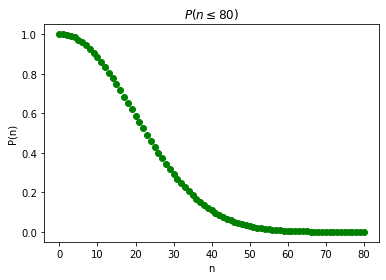

In [278]:
N = []
n =range(81)
for i in n:
    c = math.factorial(365) / (math.factorial(365-i)*(365**i))
    N.append(c)
    
plt.title('$P(n \leq 80)$')
plt.scatter(n,N,color='g')
plt.xlabel('n')
plt.ylabel('P(n)')

Lo cual cobra sentido si tenemos en cuenta el vídeo del canal Derivando recomendado para este ejercicio. Tomando la fórmula de probabilidad para $n$ personas que cumplan años en fechas iguales se puede observar que es inversa a la gráfica hallada anteriormente. Entre mayor es la probabilidad de que $n$ personas cumplan en la misma fecha, disminuye para el caso en que cumplen en fechas distintas.


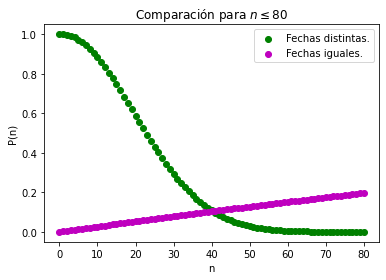

In [279]:
Nn = []
for i in n:
    c = 1 - (364/365)**i
    Nn.append(c)
    
plt.title('Comparación para $n \leq 80$')
plt.scatter(n,N,color='g',label='Fechas distintas.')
plt.scatter(n,Nn,color='m',label='Fechas iguales.')
plt.xlabel('n')
plt.ylabel('P(n)')
plt.legend()

**$9)\verb| (Python)|$** Se lanzan 4 monedas al aire, imagine que las monedas están truncadas de tal manera que la probabilidad de que la moneda $1$ sea cara es $p_1$ y que sea sello es $1 - p_1$. Usando el árbol de probabilidad, ¿cuál es la expresión de la probabilidad de obtener dos caras y dos sellos de este evento? Si el truncamiento de las monedas $1$ y $2$ puede variar como: $0.1 < p_1 < 0.9$ y $0.1 < p_2 < 0.5$, use el árbol de probabilidad para graficar la superficie de probabilidad del evento $A$. ¿En qué punto la probabilidad es mínima y máxima, y cuáles son sus valores?

**Respuesta:**

Consideremos un árbol de probabilidad convencional para la situación del lanzamiento de una moneda. En este caso, sabemos que la probabilidad de que suceda el evento de "obtener dos caras y dos sellos" es igual a la multiplicación de la probabilidad del camino por la cantidad de caminos que llevan a ese envento, es decir:

$$\mathbb{P}(C = 2, S = 2) = 0.5^{4} \cdot 6 = 0.0625 \cdot 6 = 0.375 = \frac{8}{3}$$

Ahora bien, consideremos las probabilidades resultantes de tener las dos primeras monedas truncadas, ello nos lleva a discernir entre los seis caminos diferentes para obtener una precisión de la probabilidad general del evento:

$$\mathbb{P}(CCSS) = p_{1} \cdot p_{2} \cdot 0.5^{2} = p_{1} \cdot p_{2} \cdot 0.25$$
$$\mathbb{P}(CSCS) = p_{1} \cdot (1 - p_{2}) \cdot 0.5^{2} = p_{1} \cdot (1 - p_{2}) \cdot 0.25$$
$$\mathbb{P}(CSSC) = p_{1} \cdot (1 - p_{2}) \cdot 0.5^{2} = p_{1} \cdot (1 - p_{2}) \cdot 0.25$$
$$\mathbb{P}(SCCS) = (1 - p_{1}) \cdot p_{2} \cdot 0.5^{2} = (1 - p_{1}) \cdot p_{2} \cdot 0.25$$
$$\mathbb{P}(SCSC) = (1 - p_{1}) \cdot p_{2} \cdot 0.5^{2} = (1 - p_{1}) \cdot p_{2} \cdot 0.25$$
$$\mathbb{P}(SSCC) = (1 - p_{1}) \cdot (1 - p_{2}) \cdot 0.5^{2} = (1 - p_{1}) \cdot (1 - p_{2}) \cdot 0.25$$

Sumando las probabilidades obtenemos:

$$\mathbb{P}(C = 2, S = 2) = 2 \cdot p_{1} \cdot (1 - p_{2}) \cdot 0.25 + 2 \cdot (1 - p_{1}) \cdot p_{2} \cdot 0.25 + p_{1} \cdot p_{2} \cdot 0.25 (1 - p_{1}) \cdot (1 - p_{2}) \cdot 0.25$$

Expresión que, simplificada, resulta en la siguiente función de dos variables:
$$\mathbb{P}(C = 2, S = 2)(p_{1}, p_{2}) = 0.5p_1 - 0.9375 p_1 p_2 + 0.5 p_2 -0.0625 p_1 p_2^2 -0.0625p_1^2 p_2 + 0.0625 p_1^2 p_2^2$$

Podemos hallar los máximos y mínimos empleando técnicas de cálculo, pero ello lo haremos computacionalmente a continuación:

In [9]:
def GetSample(N, ncoins, weights):
    
    Sample = np.zeros((N,ncoins))
    
    Events = [0, 1]
    
    for i in range(N):
        for j in range(ncoins):
            if weights[j] == None:
                Sample[i, j] = np.random.choice(Events, 1)[0]
            else:
                Sample[i, j] = np.random.choice(Events, 1, p = weights[j])[0]
    return Sample

In [21]:
p1_ = np.linspace(0.1, 0.9, 20)
p2_ = np.linspace(0.1, 0.5, 20)
x, y, z = np.array([]), np.array([]), np.array([])
for p1__ in p1_:
    for p2__ in p2_:
        x = np.append(x, p1__)
        y = np.append(y, p2__)

        weights = [[p1__, 1 - p1__], [p2__, 1 - p2__], [0.5, 0.5], [0.5, 0.5]]
        Sample = GetSample(1000, ncoins = 4, weights = weights)
        Frecuencias = np.array([], dtype = np.int64)

        for i in range(Sample.shape[0]):
            
            NCaras  = 0
            
            for j in range(Sample.shape[1]):
                
                if Sample[i,j] == 0:
                    NCaras += 1 
                    
            Frecuencias = np.append(Frecuencias,NCaras)


        ii = np.where( Frecuencias == 2)
        z = np.append(z, len(Frecuencias[ii])/1000)

El punto de máxima probabilidad se encuentra ubicado aproximadamente en la coordenada (0.9, 0.1), con un valor del 0.468
El punto de mínima probabilidad se encuentra ubicado aproximadamente en la coordenada (0.1, 0.1), con un valor del 0.282


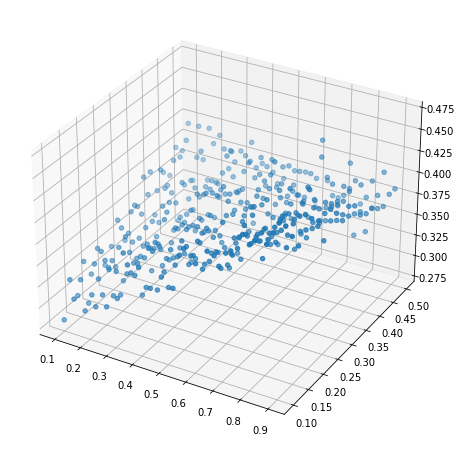

In [41]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x, y, z, cmap='viridis')

x[np.where(z == max(z))], y[np.where(z == max(z))],x[np.where(z == min(z))], y[np.where(z == min(z))]
print("El punto de máxima probabilidad se encuentra ubicado aproximadamente en la coordenada {}, con un valor del {}".format((x[np.where(z == max(z))][0], y[np.where(z == max(z))][0]), max(z)))
print("El punto de mínima probabilidad se encuentra ubicado aproximadamente en la coordenada {}, con un valor del {}".format((x[np.where(z == min(z))][0], y[np.where(z == min(z))][0]), min(z)))

A continuación la forma de la superficie que se obtiene con la ecuación que obtuvimos previamente, donde los puntos mínimos y máximos se aprecian mucho mejor.

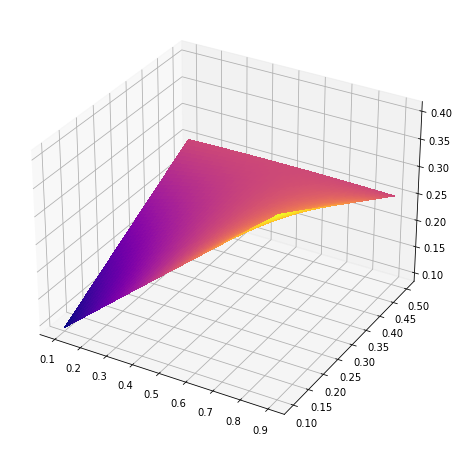

In [42]:
p1_ = np.linspace(0.1, 0.9, 100)
p2_ = np.linspace(0.1, 0.5, 100)
p_1, p_2 = np.meshgrid(p1_, p2_)
prob = 0.5*p_1 - 0.9375*p_1*p_2 + 0.5*p_2 - 0.0625*p_1*p_2**(2) - 0.0625 * p_1**(2)*p_2 + 0.0625*p_1**(2)*p_2**(2)

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(p_1, p_2, prob, cmap= 'plasma',
                       linewidth=0, antialiased=False)

**$12)\verb| (Python, Microcanonical ensemble)|$** Hay un sistema constituido por $N$ partículas, cada una puede estar en dos niveles de energía distintos (no degenerados) de valor $\epsilon_0$ y $\epsilon_1$ ($\epsilon_1$ > $\epsilon_0$). Si llamamos $n_0$ al número de partículas en el estado $\epsilon_0$ y a $n_1$ al número de partículas en el estado $\epsilon_1$. Se tienen las siguientes restricciones para la energía total y el número total de partículas:

$$E = n_{0}\epsilon_{0} + n_{1}\epsilon_{1}$$
$$N = n_{0} + n_{1}$$

$(a)$ Muestre que el numero de configuraciones posibles (micro-estados) está dado por:

$$\Omega(N, n_{0}) = \frac{N!}{n_{0}!\cdot n_{1}!}$$

**Respuesta:**

Para este problema emplearemos la fórmula del coeficiente binomial para describir la manera de distribuir un total de $n_{0}$ partículas de las $N$ proveidas en el microestado $\epsilon_{0}$ (un razonamiento equivalente aplica para el caso de $n_{1}$ y $\epsilon_{1}$, pero veremos que es el mismo resultado). Definamos pues:

$$\Omega(N, n_{0}) = C(N, n_{0}) = \frac{N!}{n_{0}! \cdot (N - n_{0})!} = \frac{N!}{n_{0}! \cdot n_{1}!}$$

Obteniendo así la expresión para los posibles micro-estados. Nótese que de tomar el valor de $n_{1}$ como referencia, el resultado es equivalente debido a la restricción $N = n_{0} + n_{1}$.

$(b)$ Usando la ecuación de la entropía $S(\Omega) = k_{b}\ln(\Omega)$ y la fórmula de Stirling $\ln(N!) \approx N\ln(N) - N$, muestre que la entropía es aproximadamente igual a:

$$S(N, n_{0}, n_{1}) = k_{b} \cdot \left[N\ln(N) - \sum_{i = 0}^{1} n_{i}\ln(n_{i})\right]$$

**Respuesta:**

Para obtener la expresión anterior es suficiente con reemplazar el valor de $\Omega$ en la ecuación base de la entropía, lo que nos lleva al siguiente resultado:

$$S(\Omega) = k_{b}\ln(\Omega) = k_{b} \cdot \ln\left(\frac{N!}{n_{0}! \cdot n_{1}!} \right) = k_{b} \cdot \left[\ln(N!) - \ln(n_{0}! \cdot n_{1}!)\right] = k_{b} \cdot \left[\ln(N!) - \ln(n_{0}!) - \ln(n_{1}!) \right]$$
$$S(\Omega) = S(N, n_{0}, n_{1}) = k_{b} \cdot \left[N\ln(N) - N - n_{0}\ln(n_{0}) + n_{0} - n_{1}\ln(n_{1}) + n_{1} \right]$$

Sabemos por la restricción que $N = n_{0} + n_{1}$, ergo $n_{0} + n_{1} - N = 0$:

$$S(N, n_{0}, n_{1}) = k_{b} \cdot \left[N\ln(N) - n_{0}\ln(n_{0}) - n_{1}\ln(n_{1})\right] = k_{b} \cdot \left[N\ln(N) - \sum_{i = 0}^{1}n_{i}\ln(n_{i})\right]$$

Obteniendo así la respuesta esperada.

$(c)$ Si definimos la fracción $x = n_{1}/N$ de partículas que se encuentra en el nivel de energía $\epsilon_{1}$. Muestre que la entropía toma la forma:

$$S(N, x) = -k_{b} \cdot \left[x\ln(x) + (1 - x)\ln(1 - x) \right]$$

donde $x = \dfrac{1}{N(\epsilon_{1} - \epsilon_{0})} \cdot (E - N\epsilon_{0})$ como función de $x$.

**Respuesta:**

Empezemos los despejes dejando la expresión de la entropía en términos exclusivos de $N$ y $x$. Para esto nos apoyaremos de las siguientes igualdades derivadas de $x = n_{1}/N$:

$$n_{1} = Nx \quad \text{\&} \quad n_{0} = N\cdot(1 - x)$$

Lo que nos deja con la siguiente expresión:

$$S(N, n_{0}, n_{1}) = k_{b} \cdot \left[N\ln(N) - n_{0}\ln(n_{0}) - n_{1}\ln(n_{1})\right] = k_{b} \cdot \left[N\ln(N) - N\cdot(1 - x) \cdot \ln(N\cdot(1 - x)) - Nx\ln(Nx)\right] = \dots$$
$$\dots = k_{b} N \cdot \left[\ln(N) - (1 - x)\cdot(\ln(N) + \ln(1 - x)) - x \cdot (\ln(N) + \ln(x))\right] = k_{b}N \cdot \left[\ln(N)\cdot(1 - (1 - x) - x) - x\ln(x) - (1 - x)\ln(1 - x)\right] = k_{b}N \cdot \left[- x\ln(x) - (1 - x)\ln(1 - x)\right]$$

Misma que al re-acomodar términos se resume en:

$$S(N, x) = -k_{b}N \cdot \left[x\ln(x) + (1 - x)\ln(1 - x)\right]$$

La expresión que queríamos verificar.


$(d)$ Dibuje la entropía $S(N, x)/(k_{b}N)$ como función de $x$.

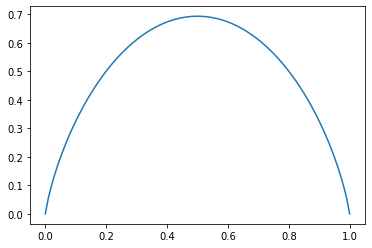

In [13]:
def Entropy(N, x, k_b):
    value = -k_b*N*(x*np.log(x) + (1 - x)*np.log(1 - x))
    return value

k_b = 1.380649 * 1e-23 # Constante de Boltzman en J/K
x = np.linspace(1e-10, 1 - 1e-10, 100) # Valores arbitrarios de x.
y = Entropy(N = 10, x = x, k_b = k_b)/(k_b*10)
plt.plot(x, y)

$(e)$ De la primera ley de la termodinámica tenemos:

$$\frac{1}{T} = \left(\frac{\partial S}{\partial E}\right)_{N} = \left(\frac{\partial S}{\partial x}\right)_{N} \cdot \left(\frac{\partial x}{\partial E}\right)_{N}$$

muestre que la proporción de partículas como función de la temperatura está dada por:

$$x(T) = \frac{1}{1 + e^{\Delta E/k_{b}T}}, \quad \Delta E = \epsilon_{1} - \epsilon_{2}.$$

**Respuesta:**

Tenemos ante nosotros una expresión que emplea las derivadas de la entropía con respecto de $x$ a un $N$ constante y la derivada de $x$ con respecto de la energía a un $N$ constante. Estas derivadas son iguales a:

$$\frac{\partial S}{\partial x} = -k_{b}N\cdot\ln\left(\frac{x}{1 - x}\right) \quad \text{\&} \quad \frac{\partial{x}}{\partial E} = \frac{1}{N \cdot \Delta E}$$

Esto nos lleva a desarrollar el siguiente despeje:

$$\frac{1}{T} = - \frac{k_{b}}{\Delta E} \cdot \ln\left(\frac{x}{1 - x}\right)$$
$$\ln\left(\frac{1 - x}{x}\right) = \frac{\Delta E}{k_{b}T}$$
$$\frac{x}{1 - x} = e^{-\Delta E/k_{b}T} \quad \Rightarrow \quad x = e^{-\Delta E/k_{b}T} - x\cdot e^{-\Delta E/k_{b}T}$$
$$x\cdot(1 + e^{-\Delta E/k_{b}T}) = e^{-\Delta E/k_{b}T}$$
$$x = \frac{e^{-\Delta E/k_{b}T}}{1 + e^{-\Delta E/k_{b}T}} = \frac{1}{1 + e^{\Delta E/k_{b}T}}$$

Obteniendo así el resultado esperado.

$(f)$ Para bajas y altas temperaturas, $ T \to 0$ y $T \to \infty$, encuentre $x(T)$. Muestre que la entropía a altas temperaturas vale:

$$\lim_{T \to \infty} S(T) = k_{b}N\ln(2).$$

In [56]:
def TemperaturePr(e_1, e_0, N, T, k_b = k_b):
    value = 1/(1 + np.e**((e_1 - e_0)/(k_b*T)))
    entropy = Entropy(N = N, x = value, k_b = k_b)
    return entropy

entropy, estimated = TemperaturePr(0.7, 0.8, 10, 1e+24), k_b*10*np.log(2)

print(r"El valor obtenido para una temperatura de $10^{}$K es de {}, mientras que el valor estimado es de {}, ambos valores poseen están separados por un {} %". format(24, entropy, estimated, round(np.abs(entropy - estimated), 4)*100))

El valor obtenido para una temperatura de $10^24$K es de 9.56983908039133e-23, mientras que el valor estimado es de 9.56992961692908e-23, ambos valores poseen están separados por un 0.0 %


$(g)$ Un gas ideal conformado por N partículas, realiza una expansión isotérmica de un volumen $V_{1} = V$ a un un volumen $V_{2} = 2V$. Calcule el cambio de entropía y compare con el resultado anterior. ¿Cómo se relacionan?

**Respuesta:**

Sabemos que la expresión para la entropía para un sistema en un proceso isotérmico se encuentra definida por la expresión:

$$S = n\cdot R\cdot \ln\left(\frac{V_{f}}{V_{i}}\right)$$

donde $n$ es el número de moles y $R$ es la constante de los gases ideales, misma que es posible expresar como $k_{b} \cdot N_{A}$, lo que nos deja la siguiente expresión:

$$S = n \cdot k_{b} \cdot N_{A}\cdot \ln\left(\frac{V_{f}}{V_{i}}\right)$$

Acá podemos reescribir el número de moles como $N/N_{A}$ (número de partículas sobre el número de Avogadro), lo que nos lleva a la expresión simplificada de:

$$S = \frac{N}{N_{A}} \cdot k_{b} \cdot N_{A}\cdot \ln\left(\frac{V_{f}}{V_{i}}\right) = N \cdot k_{b} \cdot \ln\left(\frac{V_{f}}{V_{i}}\right).$$

expresión bastante similar a la que se escribió en el inciso previo. Ahora, evaluando para valores $V_f = 2V$ y $V_{i} = V$ obtenemos:

$$S = N \cdot k_{b} \cdot \ln\left(\frac{2V}{V}\right) = N \cdot k_{b} \cdot \ln\left(2\right)$$

El valor estimado anterior, mostrando que ambos resultados son idénticos, pero que se lleva a través de diferente evaluación.

> # **6.10. Distribuciones Discretas de Probabilidad.**

**$3)\verb| (Python)|$** Un embarque de $10$ microchips similares que se envía a distribución tiene $3$ aparatos defectuosos. Si una empresa realiza un compra aleatoria de $2$ de estos microchips:

$(a)$ Muestre que la distribución de probabilidad del número de microchips defectuosos es igual a:

$$f(x) = \dfrac{\begin{pmatrix} 7 \\ 2 - x\end{pmatrix} \cdot \begin{pmatrix} 3 \\ x\end{pmatrix}}{\begin{pmatrix} 10 \\ 2 \end{pmatrix}}$$

dado:

<center>

| $x$ | $ 0 $ | $ 1 $ | $ 2 $ |
| ------- | ---- | ---- | ---- |
| $\mathbb{P}(X = x)$ | $ 7/15 $ | $ 7/15 $ | $ 1/15 $ |


**Respuesta:**

Para este problema podemos tomar la razón entre casos posibles y totales. Para los casos totales únicamente tendremos la situación en la que la empresa compre 2 chip defectuosos de los 10, es decir ${\begin{pmatrix} 10 \\ 2\end{pmatrix}}$.

Por otra parte, para los casos posibles se tendrán tres diferentes situaciones:

1) En el caso de que la empresa no compre ningún chip defectuoso, se tendrá el número de chips no defectuosos y la cantidad que compró la empresa, es decir $\begin{pmatrix} 7 \\ 2\end{pmatrix}$

2) En el caso de que la empresa compre 1 chip defectuoso, se tendrá el número de chips no defectuosos y la cantidad que compró la empresa multiplicándose con la cantidad de chips defectuosos y los que pudo adquirir la empresa, es decir $\begin{pmatrix} 7 \\ 2\end{pmatrix} \cdot \begin{pmatrix} 3 \\ 1\end{pmatrix}$

3) En el caso de que la empresa compre 2 chips defectuosos, se tendrá únicamente la cantidad de chips defectuosos y los que pudo adquirir la empresa, es decir $\begin{pmatrix} 3 \\ 2\end{pmatrix}$

Como podemos observar los tres casos anteriores son dependientes entre sí, donde el número de chips defectuosos obtenidos por la empresa será nuestra variable de referencia. Por eso, se puede generalizar la combinatoria como,

$$ f(x) = \frac{\begin{pmatrix} 7 \\ 2-x \end{pmatrix} \cdot \begin{pmatrix} 3 \\ x\end{pmatrix}}{\begin{pmatrix} 10 \\ 2\end{pmatrix}} $$

Donde la distribución de la probabilidad para cada x será,

In [142]:
def Distribution(x):
    X = (Combinatory(7,2-x) * Combinatory(3,x))/Combinatory(10,2)
    return X

print("Para x=0 la distribución es de: {}.".format(Distribution(0)))
print("Para x=1 la distribución es de: {}.".format(Distribution(1)))
print("Para x=2 la distribución es de: {}.".format(Distribution(2)))

Para x=0 la distribución es de: 0.4666666666666667.
Para x=1 la distribución es de: 0.4666666666666667.
Para x=2 la distribución es de: 0.06666666666666667.


Por lo que queda mostrada la distribución de probabilidad de los chips defectuosos.

$(b)$ ¿Cuál es el valor esperado de microchips defectuosos? **Ans:** $\hat{\mu} = 3/5 = 0.6$

In [143]:
x = [0,1,2]
u = x[0]*Distribution(0) + x[1]*Distribution(1) + x[2]*Distribution(2)

print("El resultado esperado para u es de:{}".format(u))

El resultado esperado para u es de:0.6


**$4)\verb| (Python)|$** Una caja cuántica tiene $3$ electrones, $2$ protones y $3$ neutrones. Se selecciona una muestra aleatoria de 4 partículas. Si $x$ es el número de electrones e $y$ es el número de protones:

$(a)$ Muestre que la distribución de probabilidad conjunta $f(x, y)$ es:

$$f(x, y) = \dfrac{\begin{pmatrix} 3 \\ x \end{pmatrix} \cdot \begin{pmatrix} 2 \\ y \end{pmatrix} \cdot \begin{pmatrix} 3 \\ 4 - x - y \end{pmatrix}}{\begin{pmatrix} 8 \\ 4 \end{pmatrix}}$$

**Respuesta:**

Para este problema podemos tomar la razón entre casos posibles y totales. Para los casos totales únicamente tendremos la situación en que se tomen las 4 partículas del total, es decir ${\begin{pmatrix} 8 \\ 4\end{pmatrix}}$.

Por otra parte, para los casos posibles se tendrán tres diferentes situaciones:

1) En el caso de que se escoja un electrón, es decir $\begin{pmatrix} 3 \\ x\end{pmatrix}$

2) En el caso de que se escoja un protón, es decir $\begin{pmatrix} 2 \\ y\end{pmatrix}$

3) En el caso de que se escoja un neutrón, se tendrá únicamente el total de partículas menos la cantidad de electrones y protones, es decir $\begin{pmatrix} 3 \\ 4-x-y\end{pmatrix}$

Como podemos observar los tres casos anteriores son dependientes entre sí, donde el número de partículas escogidas será nuestra variable de referencia. Por eso, se puede generalizar la combinatoria como,

$$f(x, y) = \dfrac{\begin{pmatrix} 3 \\ x \end{pmatrix} \cdot \begin{pmatrix} 2 \\ y \end{pmatrix} \cdot \begin{pmatrix} 3 \\ 4 - x - y \end{pmatrix}}{\begin{pmatrix} 8 \\ 4 \end{pmatrix}}$$

In [144]:
def f_particles(x, y):
    return Combinatory(3, x) * Combinatory(2, y) * Combinatory(3, 4 - x - y) / Combinatory(8, 4)

$(b)$ Hallar las distribuciones marginales $g(x)$ y $h(y)$.

In [148]:
def g(x,y):
    result = 0
    for y in range(3):
        result += f_particles(x, y)
    return result

print("La distribución marginal para x estará dada por la sumatoria de las posibilidades de y {}.".format(g(0,y)))

La distribución marginal para x estará dada por la sumatoria de las posibilidades de y 0.075.


In [147]:
def h(x,y):
    result = 0
    for x in range(4):
        result += f_particles(x, y)
    return result

print("La distribución marginal para y estará dada por la sumatoria de las posibilidades de x {}.".format(h(x,0)))

La distribución marginal para y estará dada por la sumatoria de las posibilidades de x 0.21785714285714286.


$(c)$ $\mathbb{E}(x) = 105/70$.

Los valores de x estarán dados por la expresión:

$$\mathbb{E}(x) = \sum_{x=0}^{3} x \cdot g(x)$$

In [149]:
Ex = 0
for x in range(4):
    Ex += x * g(x,0)
    
print("El valor esperado para x es de: {}.".format(Ex))

El valor esperado para x es de: 1.5107142857142857.


$(d)$ $\mathbb{E}(y) = 1$.

Los valores de y estarán dados por la expresión:

$$\mathbb{E}(y) = \sum_{y=0}^{2} y \cdot h(y)$$

In [150]:
Ey = 0
for y in range(3):
    Ey += y * h(0,y)
    
print("El valor esperado para y es de: {}".format(Ey))

El valor esperado para y es de: 1.0071428571428571


$(e)$ Calcular la covarianza usando $\sigma_{xy} = \mathbb{E}(xy) -\mathbb{E}(x) \cdot \mathbb{E}(y) = -3/14$.

In [151]:
def Exy():
    result = 0
    for x in range(4):
        for y in range(3):
            result += x * y * f_particles(x, y)
    return result

coxy_1 = Exy() - Ex*Ey
print("La covarianza usando la fórmula dada es de: {}.".format(coxy_1))

La covarianza usando la fórmula dada es de: -0.2143622448979594.


$(f)$ Calcular la covarianza usando $\sigma_{xy} = \mathbb{E}((x - \hat{\mu}_{x})(y - \hat{\mu}_{y})) -\mathbb{E}(x) \cdot \mathbb{E}(y) = -3/14$.

In [154]:
#Para este caso u_x, u_y respectivamente son los valores esperados de x, y. 
coxy_2 = Exy() - Ex*Ey
print("La covarianza usando la fórmula dada es de: {}.".format(coxy_2))

La covarianza usando la fórmula dada es de: -0.2143622448979594.


$(g)$ ¿Son las variables $x$ e $y$ independientes?

Para determinar si dos variables aleatorias son independientes entre sí, su función de densidad conjunta debe ser igual al producto de sus funciones de densidad marginales.

In [289]:
#Producto de funciones de densidad marginales.
g(0,2)*h(3,0)

0.016339285714285712

In [290]:
#Función de densidad conjunta.
f_particles(3,2)

0.0035714285714285713

Como podemos observar, no se obtienen los mismos resultados para la ecuación por lo que podemos concluir que las variables no son independientes.

> # **6.12. Distribuciones Continuas de Probabilidad.**

**$1)\verb| (Sympy)|$** Dada la función de probabilidad conjunta:

$$f(x) = \left\{
        \begin{array}{cc}
        \dfrac{2}{3} \cdot (x + 2y) & \text{si} \quad 0 \leq x \leq 1, \quad 0 \leq y \leq 1. \\
        0 & \text{si ocurre cualquier otro caso.}
        \end{array} \right.$$

encuentre analíticamente y a través de Sympy los siguientes valores:

$(a)$ Verifique que sea una función de densidad conjunta válida.

Para demostrar que la función de densidad conjunta sea válida se necesita que cumpla con dos condiciones.

1) La función es positiva para el intervalo de muestra: Dado que $0 \leq x \leq 1$ y $0 \leq y \leq 1$, tenemos que 

$$\frac{2}{3}(x + 2y) \geq 0 \rightarrow x + 2y \geq 0$$

Si evaluamos en los extremos del intervalo podemos observar que siempre se cumple la condición propuesta.

$$0 + (2)(0) \geq 0 \land 1 + (2)(1) \geq 0$$

Además, se puede observar que siempre se cumplirá dicha condición para todo $(x, y)$ en el espacio de muestra ya que la suma de dos números positivos siempre será positiva. Por lo que queda demostrado que la función será positiva para el intervalo dado.

2) La integral evaluada en el intervalo dado es igual a uno: Para ello usaremos la librería sympy donde claramente se puede ver que esta condición se cumple.

In [291]:
x, y = sym.symbols('x y')
f = (2/3)*(x+2*y)

Integrate = sym.integrate(sym.integrate(f, (x, 0, 1)), (y, 0, 1))

print("El resultado de la integral evaluada en el intervalo de muestra es:{}".format(Integrate))

El resultado de la integral evaluada en el intervalo de muestra es:1.00000000000000


$(b)$ Hallar las distribuciones marginales $g(x)$ y $h(y)$.

In [292]:
print("La distribución marginal de x estará dada por la integral con respecto a y de la función:")
gx = sym.integrate(f, (y, 0, 1))
gx

La distribución marginal de x estará dada por la integral con respecto a y de la función:


0.666666666666667*x + 0.666666666666667

In [293]:
print("La distribución marginal de y estará dada por la integral con respecto a x de la función:")
hy = sym.integrate(f, (x, 0, 1))
hy

La distribución marginal de y estará dada por la integral con respecto a x de la función:


1.33333333333333*y + 0.333333333333333

$(c)$ $\mathbb{E}(x) = 10/18$.

Los valores de x estarán dados por la expresión:

$$\mathbb{E}(x) = \int_{0}^{1} x \cdot g(x) dx$$

In [294]:
Ex = sym.integrate(gx*x, (x, 0, 1))
print("El valor esperado para x es de:{}".format(Ex))

El valor esperado para x es de:0.555555555555556


$(d)$ $\mathbb{E}(y) = 11/18$.

Los valores de y estarán dados por la expresión:

$$\mathbb{E}(y) = \int_{0}^{1} y \cdot h(y) dy$$

In [295]:
Ey = sym.integrate(hy*y, (y, 0, 1))
print("El valor esperado para y es de:{}".format(Ey))

El valor esperado para y es de:0.611111111111111


$(e)$ Calcular la covarianza usando $\sigma_{xy} = \mathbb{E}(xy) -\mathbb{E}(x) \cdot \mathbb{E}(y) = -0.00617$.

In [296]:
Exy = sym.integrate(sym.integrate(f*x*y, (x, 0, 1)), (y, 0, 1))
coxy_1 = Exy - Ex*Ey

print("La covarianza usando la fórmula dada es de:{}".format(coxy_1))

La covarianza usando la fórmula dada es de:-0.00617283950617281


$(f)$ Calcular la covarianza usando $\sigma_{xy} = \mathbb{E}((x - \hat{\mu}_{x})(y - \hat{\mu}_{y})) -\mathbb{E}(x) \cdot \mathbb{E}(y) = -0.00617$.

In [297]:
#Para este caso u_x, u_y respectivamente son los valores esperados de x, y.
Exx = x - Ex
Eyy = y - Ey
coxy_2 = sym.integrate(sym.integrate(Exx*Eyy*f, (x, 0, 1)), (y, 0, 1))

print("La covarianza usando la fórmula dada es de:{}".format(coxy_2))

La covarianza usando la fórmula dada es de:-0.00617283950617284


$(g)$ ¿Son las variables $x$ e $y$ indepentientes?

Para determinar si dos variables aleatorias son independientes entre sí, su función de densidad conjunta debe ser igual al producto de sus funciones de densidad marginales.

In [298]:
#Producto de funciones de densidad marginales.
gx*hy

(0.666666666666667*x + 0.666666666666667)*(1.33333333333333*y + 0.333333333333333)

In [299]:
#Función de densidad conjunta.
f

0.666666666666667*x + 1.33333333333333*y

Como podemos observar, no se obtienen los mismos resultados para la ecuación por lo que podemos concluir que las variables no son independientes.

$(4)$ Una variable aleatoria continua $X$ tiene una función densidad:

$$f(x) = \left\{
        \begin{array}{cc}
        e^{-x} & \text{si} \quad x > 0 \\
        0 & \text{si ocurre cualquier otro caso.}
        \end{array} \right.$$

Encuentre el valor esperado de $g(X) = e^{2X/3} = 3$. Recuerde que el valor esperado de la variable aleatoria $g(X)$ está dado por:

$$\hat{\mu}_{g(X)} = \int_{-\infty}^{\infty} g(x)f(x) dx$$

**Respuesta:**

Como ya sabemos, el valor esperado de la variable aleatoria $g(X)$ lo podemos hallar evaluando el valor de la integral:

$$\hat{\mu}_{g(X)} = \int_{-\infty}^{\infty} g(x)f(x) dx$$

Es posible reducir esta expresión de la siguiente manera:

$$\hat{\mu}_{g(X)} = \int_{-\infty}^{\infty} g(x)f(x) dx = \int_{-\infty}^{\infty} e^{2x/3} \cdot e^{-x} dx = \int_{-\infty}^{0} e^{2x/3} \cdot 0 dx + \int_{0}^{\infty} e^{2x/3} \cdot e^{-x} dx$$

Separamos la expresión ya que la función de densidad está definida de manera diferente de $(-\infty, 0]$, con un valor nulo, y de $(0, \infty)$ de $e^{-x}$, lo que nos deja con:

$$\hat{\mu}_{g(X)} = \int_{0}^{\infty} e^{2x/3} \cdot e^{-x} dx = \int_{0}^{\infty} e^{-x/3}dx = \lim_{\alpha \to \infty} \left[-3e^{-x/3}\right]_{0}^{\alpha} = \lim_{alpha \to \infty} -3e^{-\alpha/3} + 3e^{0} = 0 + 3$$
$$\hat{\mu}_{g(X)} = 3$$

Es decir, hemos verificado que el valor esperado de $g(X) = e^{2X/3}$ es igual a $3$.

In [21]:
func1 = lambda x: np.e**(2*x/3) * 0
func2 = lambda x: np.e**(2*x/3 - x)

integrate.quad(func1, -np.inf, 0) + integrate.quad(func2, 0, np.inf)

(0.0, 0.0, 3.000000000000001, 2.2280702668917447e-08)

> # **6.16. Metropolis-Hasting Algorithm.**

**$1)\verb| (Sympy)|$** Se lanza una moneda $n = 10$ veces y se encuentra que $r = 7$ veces cae cara. Usando el algoritmo de Metrópolis:

$(a)$ Encuentre el parámetro asociado a la probabilidad de éxito $\hat{p}$ de la distribución binomial, es decir, encuentre el máximo de la distribución posterior.


In [132]:
# Definimos la función de distribución a priori.

def DistPrior(p): 
    return np.piecewise( p, [p > 0 and p < 1, p <= 0 and p >= 1], [lambda p: 1, lambda p:0])

DistPrior = np.vectorize(DistPrior)

# Definimos la función de Likelihood Binomial y de inmediato definimos la Distribución Posterior:

def Likelihood(p,r,n):
    return sym.binomial(n, r) * p**(r) * (1 - p)**(n - r)

def Dist_Posterior(p,r,n):
    return Likelihood(p,r,n)*DistPrior(p)

r, n, p = 7, 10, np.linspace(0,1,100)

I = integrate.quad(Dist_Posterior, p[0], p[-1],args=(r,n))[0] 

In [109]:
def MetropolisHasting(x0, Posterior, NSteps = int(1e4), delta = 0.4):
    
    x = np.zeros((NSteps,1))
    x[0] = x0
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(x[i - 1], r, n)
        xf = x[i - 1] + delta*2*(np.random.rand() - 0.5)
        P1 = Posterior(xf, r, n)
        
        alpha = np.minimum(1, P1/P0)
        g = np.random.rand()
        
        if alpha > g:
            x[i, 0] = xf
        else:
            x[i, :] = x[i - 1,:]
    return x[1000:,:]

initial = np.array([0.1])
Data = MetropolisHasting(initial,Dist_Posterior)
p_hat = np.mean(Data)


100%|██████████| 9999/9999 [00:17<00:00, 587.17it/s]


El valor del parámetro asociado a la probabilidad de éxito es aproximadamente igual a: 0.6614144278690929.


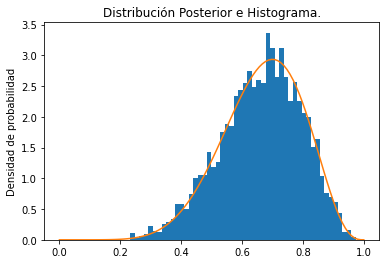

In [133]:
plt.hist(Data,density=True,bins=50)
plt.plot(p, Dist_Posterior(p,r,n)/I)
plt.ylabel('Densidad de probabilidad')
plt.title('Distribución Posterior e Histograma.')
print("El valor del parámetro asociado a la probabilidad de éxito es aproximadamente igual a: {}.".format(p_hat))

$(b)$ Usando la varianza binomial y los cuantiles de la distribución posterior, encuentre los errores asociados al parámetro $\hat{p}$ a un nivel de confianza del $68\%$ (i.e, $\sigma^{+}_{-}$).


In [113]:
# Cálculo de la varianza binomial.
variance = p_hat * (1 - p_hat) / n

# Cálculo de los cuantiles
quantile_lower = stats.beta.ppf(0.16, 7, 10 - 7 + 1)
quantile_upper = stats.beta.ppf(0.84, 7, 10 - 7 + 1)

# Cálculo de los errores
error_lower = sym.sqrt(variance) * (p_hat - quantile_lower)
error_upper = sym.sqrt(variance) * (quantile_upper - p_hat)

# Resultados
print("Error inferior del parámetro p:", error_lower)
print("Error superior del parámetro p:", error_upper)


Error inferior del parámetro p: 0.0252631141041051
Error superior del parámetro p: 0.0176477688273976


$(c)$ ¿Podemos decir que la moneda está truncada? Utilice la siguiente distribución a priori para el espacio de parámetros:

$$\pi(p) = \left\{
        \begin{array}{cc}
        1 & \text{si} \quad 0 < p < 1 \\
        0 & \text{si ocurre cualquier otro caso.}
        \end{array} \right.$$

**Respuesta:**

Dado que la diferencia entre la distribución a priori y la distribución posterior es considerablemente grande, una conclusión válida para esta situación sería que la moneda, ciertamente, se encuentra truncada.

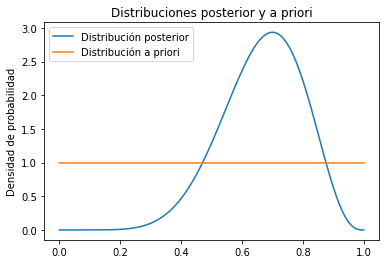

In [101]:
# Distribución a priori
prior = np.ones_like(p)

# Visualización de las distribuciones
plt.plot(p, Dist_Posterior(p,r,n)/I, label='Distribución posterior')
plt.plot(p, prior, label='Distribución a priori')
plt.ylabel('Densidad de probabilidad')
plt.title('Distribuciones posterior y a priori')
plt.legend()
plt.show()

**$3)\verb| (Python)|$** Usando el algoritmo de Metrópolis, realice el muestreo de $N = 1000$ eventos de una distribución normal: $\mathfrak{A} \cong \mathfrak{N} (x; \mu = 2, \sigma = 0.5).$


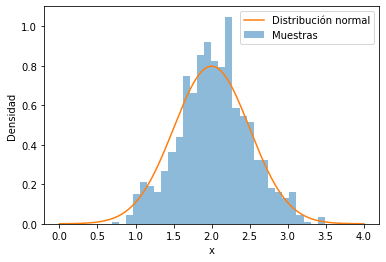

In [300]:
#Defino los parámetros.
mu = 2
sigma = 0.5
N = 1000
x = np.random.normal(mu, sigma)
step = 0.5
samples = []

#Función para una distribución normal.
def f(x): 
    return (1/(sigma*np.sqrt(2*np.pi)))*(np.exp((-(x-mu)**2)/sigma))


for i in range(N):
    #Se generan pasos entre x.
    x_ = x + np.random.normal(0, step)
    
    #Se genera el radio de aceptación del algoritmo.
    acept = min(1, f(x_) / f(x))
        
    #Se revisa que entra dentro del radio de aceptación.
    if np.random.rand() < acept:
        x = x_
    
    samples.append(x)
    
#Se grafica la distribución normal esperada con la libreria scipy.stats.norm
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
y = norm.pdf(x, mu, sigma)

fig, ax = plt.subplots()
ax.hist(samples, bins=30, density=True, alpha=0.5, label='Muestras')
ax.plot(x, y, label='Distribución normal')
ax.set_xlabel('x')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

**$4)\verb| (Python)|$** Usando el algoritmo de Metrópolis, realice el muestreo de $N = 1000$ eventos de una distribución estándar de Cauchy $\mathfrak{A} \cong f(x:0,1)$.

$$f(x: 0,1) = \frac{1}{\pi \cdot (1 + x^{2})}$$

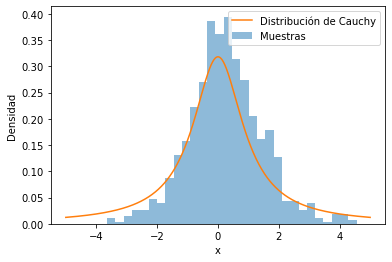

In [319]:
#Defino los parámetros.
x0 = 0
gamma = 1
N = 1000
step = 0.5
x = 0
samples = []

#Función para una distribución de Cauchy.
def f(x): 
    return 1/(np.pi*(1+x**2)) 

for i in range(N):
    #Se generan pasos entre x.
    x_ = x + np.random.normal(0, step)
    
    #Se genera el radio de aceptación del algoritmo.
    acept = min(1, f(x_) / f(x))
        
    #Se revisa que entra dentro del radio de aceptación.
    if np.random.rand() < acept:
        x = x_
    
    samples.append(x)
    
#Se grafica la distribución de Cauchy esperada con la libreria scipy.stats.cauchy
x = np.linspace(-5, 5, 1000)
y = cauchy.pdf(x, x0, gamma)

fig, ax = plt.subplots()
ax.hist(samples, bins=30, density=True, alpha=0.5, label='Muestras')
ax.plot(x, y, label='Distribución de Cauchy')
ax.set_xlabel('x')
ax.set_ylabel('Densidad')
ax.legend()
plt.show()

> # **8.7. Parameter Estimation.**

**$3)\verb| (Python) |$** Implemente el algoritmo de Metrópolis Hastings para hacer el ajuste de un histograma cuyas frecuencias relativas siguen una distribución normal.

$(a)$ Descargue los datos del siguiente link: https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Gaussiano.csv

In [302]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Gaussiano.csv'
data = pd.read_csv(url)
x = data['x'].values

$(b)$ Utilice la siguiente distribución a priori uniforme:

$$\pi(\mu, \sigma) = \left\{
        \begin{array}{cc}
        1 & \text{si} \quad 3 \leq \mu \leq 5, \quad 0.5 \leq \sigma \leq 3.5 \\
        0 & \text{si ocurre cualquier otro caso.}
        \end{array} \right.$$

In [303]:
def prior(mu, sigma):
    if 3 <= mu <= 5 and 0.5 <= sigma <= 3.5:
        return 1
    else:
        return 0

$(c)$ Escriba la función de Likelihood Gaussiana:

$$\mathfrak{L}(\mathbf{x}/\mu, \sigma) = \prod_{i = 1}^{N} \frac{1}{\sqrt{2 \pi \sigma^{2}}} \cdot e^{- (\mu - x_{i})^{2}/2\sigma^{2}}.$$

In [304]:
def likelihood(x, mu, sigma):
    N = len(x)
    L = 1
    for i in range(N):
        L *= (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((mu - x[i])**2) / (2*sigma**2))
    return L

$(d)$ Calcule el algoritmo de la distribución posterior:

$$\ln(\mathbb{P}(\mu, \sigma/\mathbb{x})) \cong \ln(\mathfrak{L}(\mathbf{x}/\mu, \sigma) \cdot \pi(\mu, \sigma))$$

Dado que la distribución encontrada no está normalizada, la relación que existe es de proporcionalidad.

In [305]:
def log_posterior(x, mu, sigma):
    return np.log(likelihood(x, mu, sigma) * prior(mu, sigma))

$(e)$ Use el algoritmo de Metrópolis para realizar el muestreo de $\ln(\mathbb{P}(\mu, \sigma/\mathbb{x}))$ con $N = 2 \times 10^{4}$ eventos.

In [306]:
def metropolis(x, N=2000):
    mu_0 = np.random.uniform(3, 5)
    sig_0 = np.random.uniform(0.5, 3.5)
    log_actual = log_posterior(x, mu_0, sig_0)
    
    mu_s = [mu_0]
    sig_s = [sig_0]
    
    for i in range(N):
        mu_p = np.random.normal(mu_0, 0.1)
        sig_p = np.random.normal(sig_0, 0.1)
        log_propp = log_posterior(x, mu_p, sig_p)
        
        if log_propp > log_actual:
            mu_0 = mu_p
            sig_0 = sig_p
            log_actual = log_propp
            
        else:
            p_accept = np.exp(log_propp - log_actual)
            
            if np.random.uniform() < p_accept:
                mu_0 = mu_p
                sig_0 = sig_p
                log_actual = log_propp
                
        mu_s.append(mu_0)
        sig_s.append(sig_0)
    
    return mu_s, sig_s

$(f)$ Estime el mejor valor de los parámetros del modelo $(\hat{\mu}, \hat{\sigma})$.

**Respuesta:**

Dado que el modelo anterior es una distribucón normal podemos asegurar que el mejor valor de los parámetros estará dada por la mediana.

In [307]:
mu_samples, sigma_samples = metropolis(x)

In [308]:
mu_hat = np.percentile(mu_samples,50)
sigma_hat = np.percentile(sigma_samples,50)

print("El mejor valor de los parámetros respectivamente son mu = {} y sigma = {}".format(mu_hat,sigma_hat))

El mejor valor de los parámetros respectivamente son mu = 3.995960914444339 y sigma = 1.849146434200178


$(g)$ Encuentre los errores $\sigma +,-$ de los parámetros en un intervalo de confianza del CL = 68%

**Respuesta:**

Primero, hallaremos los valores dados para el percentil. En este caso, el percentil menor será 16% y el mayor de 84%.

In [309]:
mu_lower = np.percentile(mu_samples, 16)
mu_upper = np.percentile(mu_samples, 84)
sigma_lower = np.percentile(sigma_samples, 16)
sigma_upper = np.percentile(sigma_samples, 84)

Dado que estos son nuestros valores límites de confianza para el porcentaje establecido, los errores estarán establecidos por la diferencia entre el valor encontrado para cada percentil y el mejor valor estimado.

In [310]:
mu_error_lower = mu_hat - mu_lower
mu_error_upper = mu_upper - mu_hat
sigma_error_lower = sigma_hat - sigma_lower
sigma_error_upper = sigma_upper - sigma_hat

print("Los valores del error para mu respectivamente son:{} y {}".format(mu_error_lower,mu_error_upper))
print("Los valores del error para sigma respectivamente son:{} y {}".format(sigma_error_lower,sigma_error_upper))

Los valores del error para mu respectivamente son:0.17685016492919337 y 0.17191577732752705
Los valores del error para sigma respectivamente son:0.1322081685479508 y 0.15685909322277491


A continuación, se muestra la gráfica del histograma para dicho conjunto de datos. 

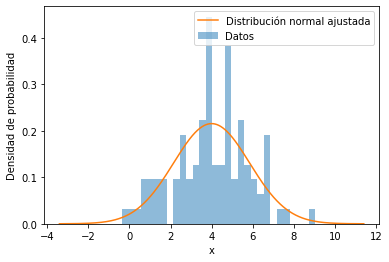

In [311]:
#Se grafica la distribución normal esperada con la libreria scipy.stats.norm
x_values = np.linspace(mu_hat - 4*sigma_hat, mu_hat + 4*sigma_hat, 1000)
y_values = norm.pdf(x_values, mu_hat, sigma_hat)


fig, ax = plt.subplots()
ax.hist(x, bins=30, density=True, alpha=0.5, label='Datos')
ax.plot(x_values, y_values, label='Distribución normal ajustada')
ax.set_xlabel('x')
ax.set_ylabel('Densidad de probabilidad')
ax.legend()
plt.show()

**$5)\verb| (Python) |$** En general la varianza de estimadores es no calculable:

$$V(\hat{\theta}) = E(\hat{\theta}^{2}) - E(\hat{\theta})^{2}.$$

En el caso de la distribución exponencial tenemos un valor analítico dado por:

$$V(\hat{\theta}) = \int_{0}^{\infty} \dots \int_{0}^{\infty} \left(\frac{1}{n} \cdot \sum_{i = 1}^{n} x_{i} \right)^{2} \cdot \frac{1}{\theta} e^{-x_{1}/\theta} \dots \frac{1}{\theta} \cdot e^{-x_{n}/\theta} dx_{1} \cdots dx_{n} - \left[ \int_{0}^{\infty} \dots \int_{0}^{\infty} \left(\frac{1}{n} \cdot \sum_{i = 1}^{n} x_{i} \right) \cdot \frac{1}{\theta} e^{-x_{1}/\theta} \dots \frac{1}{\theta} \cdot e^{-x_{n}/\theta} dx_{1} \cdots dx_{n} \right]^{2} = \frac{\theta^{2}}{n}.$$

$(a)$ Intente encontrar este resultado analíticamente.


$(b)$ Con el método de MonteCarlo compruebe este resultado para un conjunto de $n = 20$ variables aleatorias $x_i \dots x_{n} \cong Exp(\theta = 2)$. Generar varias muestras de distribuciones exponenciales para tener un buen promedio en el ensamble, por ejemplo: $N = 10^{6}$. (Se obtiene algo como $Var((\hat{\theta})) = 0.199$).

In [129]:
n, N, theta = 20, int(1e+6), 2
data = np.random.exponential(scale = theta, size = (N, n))
mean = np.mean(data, axis = 1)
print("El valor de la varianza obtenido con el resultado teórico sería exactamente igual a {}, mientras que el resultado obtenido con el método de MonteCarlo sería de aproximadamente {}.".format(theta**(2)/n, np.var(mean)))

El valor de la varianza obtenido con el resultado teórico sería exactamente igual a 0.2, mientras que el resultado obtenido con el método de MonteCarlo sería de aproximadamente 0.20011516084118788.
